# Image Patches

In this module, we will explore the topology of different collections of image patches capturing line segments, which, as we will show using persistent homology and projective coordinates, concentrate on the projective plane $RP^2$.  Each image patch is a square $d \times d$ region of pixels.  Each pixel can be thought of as a dimension, so each patch lives in $\mathbb{R}^{d \times d}$, and a collection of patches can be thought of as a Euclidean point cloud in $\mathbb{R}^{d \times d}$

First, we perform all of the necessary library imports.  

In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
import warnings
warnings.filterwarnings('ignore')

from dreimac import ProjectiveCoords, CircularCoords, GeometryUtils, GeometryExamples, PlotUtils

## Oriented Line Segments

We now examine the collection of patches which hold oriented, slightly blurry line segments that are varying distances from the center of the patch.  First, let's start by setting up the patches.  Below, the "dim" variable sets the patch resolution, and the "sigma" variable sets the blurriness (a larger sigma means blurrier line segments). 

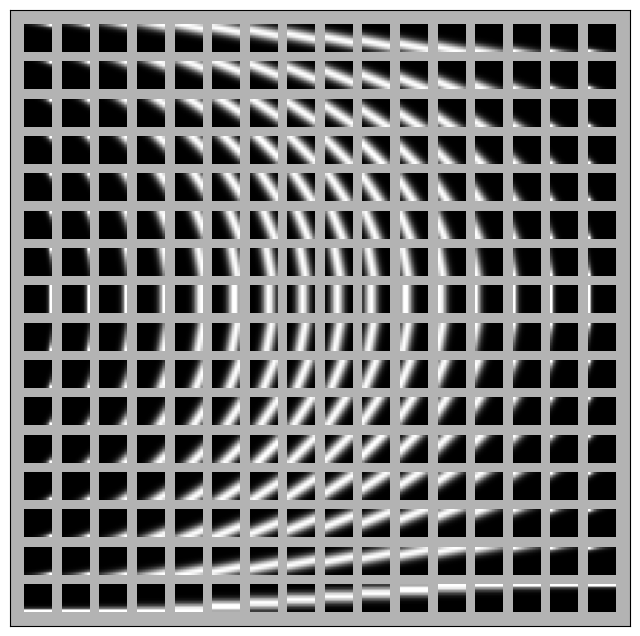

In [2]:
P = GeometryExamples.line_patches(dim=10, n_angles=16, n_offsets=16, sigma=0.25)
plt.figure(figsize=(8, 8))
PlotUtils.plot_patches(P, zoom=2)
ax = plt.gca()
ax.set_facecolor((0.7, 0.7, 0.7))
plt.show()

Now let's compute persistence diagrams for this collection of patches.  This time, we will compute with both $\mathbb{Z}/2$ coefficients and $\mathbb{Z}/3$ coefficients up to H2.

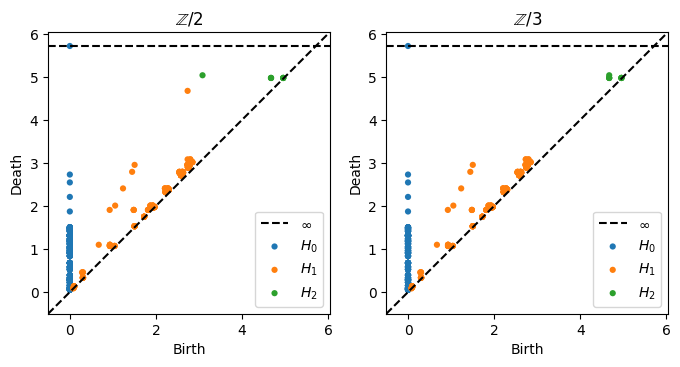

In [3]:
dgmsz2 = ripser(P, coeff=2, maxdim=2)['dgms']
dgmsz3 = ripser(P, coeff=3, maxdim=2)['dgms']
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_diagrams(dgmsz2)
plt.title("$\mathbb{Z}/2$")
plt.subplot(122)
plot_diagrams(dgmsz3)
plt.title("$\mathbb{Z}/3$")
plt.show()

Notice how there is one higher persistence dot both for H1 and H2, which both go away when switching to $\mathbb{Z} / 3\mathbb{Z}$.  This is the signature of the projective plane!  To verify this, we will now look at these patches using "projective coordinates" (finding a map to $RP^2$).


In [4]:
P = GeometryExamples.line_patches(dim=10, n_angles=200, n_offsets=200, sigma=0.25)
proj = ProjectiveCoords(P, n_landmarks=200)
cc = CircularCoords(P, n_landmarks=200, prime=2)
h1 = proj.dgms_[1]
# Use the index with greatest persistence in H1 and use
# the cocycle corresponding to that
idx = 0
#print("Persistence at index {}: {}".format(idx, h1[idx, 1]-h1[idx, 0]))
#res = proj.get_coordinates(proj_dim=2, perc=0.9, cocycle_idx=idx)
res = cc.get_coordinates(perc=0.9, cohomology_class=idx, check_and_fix_cocycle_condition=True)
X = res['X']

number of faces:  38645
failure: 126.7596150199266


Exception: The cohomology class at index 0 does not have an integral lift.

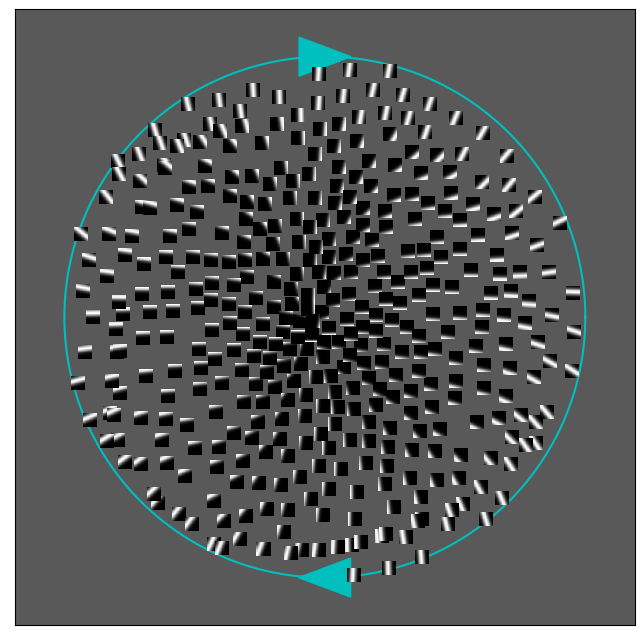

In [5]:
idx = GeometryUtils.get_greedy_perm_pc(X, 400)['perm']
SFinal = ProjectiveCoords.get_stereo_proj_codim1(X[idx, :])
P = P[idx, :]

plt.figure(figsize=(8, 8))
PlotUtils.imscatter(SFinal, P, 10)
PlotUtils.plot_proj_boundary()
plt.show()